# dataset construction

In [13]:
from multiplane import *
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

import torch

from odak.wave import wavenumber,propagate_beam

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import gc

In [14]:
train_X = []
train_y = []

In [37]:
resolution = 256 #512

root_path = './data/models/train'
files = os.listdir( root_path )

# rotate to get view from six views
normal_angles = np.array([[1,0,0], 
                          [0,1,0]]) * (np.pi/2) #, 
                          #[1,0,0],
                          #[0,1,0],
                          #[1,0,0]]) * (np.pi/2)
            
# add random angle to produce smooth depth, and avoid large area occlusion
random_angles_prepare = np.random.rand(len(files),3,3) * (np.pi/6) * np.random.choice((-1,1))

num_samples = 10000000
num_layers = 200
layer_dist = 0.00005

remove_list = []   # outlier removal index

In [16]:
asd=0
for file in files:
    mesh = o3d.io.read_triangle_mesh(root_path + '/' + file)
    mesh.compute_vertex_normals()
    # o3d.visualization.draw_geometries([mesh])   
    
    pcd = mesh.sample_points_uniformly(number_of_points=num_samples)
    pcd.points = o3d.utility.Vector3dVector(normalize(np.array(pcd.points), 1, 1, 1))
    # o3d.visualization.draw_geometries([pcd])
    
    # input point cloud
    points = np.array(pcd.points)
    
    
    # release memory
    del mesh
    del pcd
    
    
    # add random angle to produce smooth depth, and avoid large area occlusion
    random_angles = random_angles_prepare[asd]
    
    
    transform = Transform(points)
    for i, angle in enumerate(random_angles):
        
        if i == 0:
            for j in range(3):
                subtransform = Transform(transform.pcd.copy())
                pcd = transform.rotation(angle[j], j)
                
            # o3d.visualization.draw_geometries([prepareO3D(pcd)])
                
        else: 
            calib = normal_angles[i-1]
            
            for k in range(3):
                pcd = transform.rotation(calib[k], k)
            
            
            for l in range(3):
                subtransform = Transform(transform.pcd.copy())
                pcd = transform.rotation(angle[l], l)
                
            # o3d.visualization.draw_geometries([prepareO3D(pcd)])
            
        
        # generate training piece
        
        # ground truth, y
        grid_list = multipleGrid(pcd, int(num_layers/20), (resolution,resolution),(1,1,1), keep_ratio=False)
        
        # occlusion
        mask = np.ones(grid_list[0].shape)
        for idx in range(len(grid_list)):
            qwe = idx
            idx = (idx+1)*-1
            grid_list[idx] *= mask
            mask = occlusionMask(mask, grid_list[idx])
            
            
            if np.sum(grid_list[idx]) < (resolution*resolution) *0.01:
                remove_list.append(10*len(train_y)+qwe)
            else:
                pass
            
            
        train_y.append( np.asarray(list(reversed(grid_list) )))
    
        
        # generate input,x
        # hologram = layer_based_hologram(pcd, 25, [resolution,resolution], propagation_type='Bandlimited Angular Spectrum')
        
        # subrec_list = []
        # for idx in range(25):
            # subrec = propagate_beam(hologram, (2*np.pi)/(650*1e-9), -0.15-idx*0.004, 8e-06, 650*1e-9, 'Bandlimited Angular Spectrum')
            # subrec = subrec[ int(resolution/2):int((resolution/2+resolution)), int(resolution/2):int((resolution/2+resolution)) ]
            
            # extract amplitude and phase
            # amplitude = np.abs(subrec).reshape(resolution, resolution, -1)
            # phase = np.arctan(subrec.imag / subrec.real).reshape(resolution, resolution, -1)
            # subrec = np.concatenate((amplitude, phase), axis=-1)
            
            # subrec_list.append( subrec )
            
        # train_X.append( np.asarray(subrec_list) )
        
        # print(i)
        
    gc.collect()
    
    asd += 1 
    print(asd)


np.save('train_y_256',np.array(train_y).reshape(-1,resolution,resolution))
        
    

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
3
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
4
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
5
6
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
7
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
8
9
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
10
11
12
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
13
14
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
15
16
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
17
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
18
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
19
[Open3D INFO] Skipping non-t

In [17]:
asd=0
for file in files:
    mesh = o3d.io.read_triangle_mesh(root_path + '/' + file)
    mesh.compute_vertex_normals()
    # o3d.visualization.draw_geometries([mesh])   
    
    pcd = mesh.sample_points_uniformly(number_of_points=num_samples)
    pcd.points = o3d.utility.Vector3dVector(normalize(np.array(pcd.points), 1, 1, 1))
    # o3d.visualization.draw_geometries([pcd])
    
    # input point cloud
    points = np.array(pcd.points)
    
    
    # release memory
    del mesh
    del pcd
    
    
    # add random angle to produce smooth depth, and avoid large area occlusion
    random_angles = random_angles_prepare[asd]
    
    
    transform = Transform(points)
    for i, angle in enumerate(random_angles):
        
        if i == 0:
            for j in range(3):
                subtransform = Transform(transform.pcd.copy())
                pcd = transform.rotation(angle[j], j)
                
            # o3d.visualization.draw_geometries([prepareO3D(pcd)])
                
        else: 
            calib = normal_angles[i-1]
            
            for k in range(3):
                pcd = transform.rotation(calib[k], k)
            
            
            for l in range(3):
                subtransform = Transform(transform.pcd.copy())
                pcd = transform.rotation(angle[l], l)
                
            # o3d.visualization.draw_geometries([prepareO3D(pcd)])
            
        
        # generate training piece
        
        # ground truth, y
        # grid_list = multipleGrid(pcd, 25, (resolution,resolution),(1,1,1), keep_ratio=False)
        
        # occlusion
        # mask = np.ones(grid_list[0].shape)
        # for idx in range(len(grid_list)):
        #     grid_list[idx] *= mask
        #     mask = occlusionMask(mask, grid_list[idx])
        
        # train_y.append( np.asarray(grid_list) )
    
        
        # generate input,x
        hologram = layer_based_hologram(pcd, num_layers, [resolution,resolution], layer_dist=layer_dist, propagation_type='Bandlimited Angular Spectrum')
        
        subrec_list = []
        for idx in range(int(num_layers/20)):
            subrec = propagate_beam(hologram, (2*np.pi)/(650*1e-9), -0.15-idx*20*layer_dist, 8e-06, 650*1e-9, 'Bandlimited Angular Spectrum')
            subrec = subrec[ int(resolution/2):int((resolution/2+resolution)), int(resolution/2):int((resolution/2+resolution)) ]
            
            # extract amplitude and phase
            amplitude = np.abs(subrec).reshape(-1, resolution, resolution)
            phase = np.arctan(subrec.imag / subrec.real).reshape(-1, resolution, resolution)
            subrec = np.concatenate((amplitude, phase), axis=0)
            
            subrec_list.append( subrec )
            
        del hologram
        
        train_X.append( np.asarray(subrec_list) )
        
        # print(i)
        
    gc.collect()
    
    asd += 1 
    print(asd)
    
    
np.save('train_X_256',np.array(train_X).reshape(-1,2,resolution,resolution))

    

[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
3
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
4
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
5
ready
ready
ready
6
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
7
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
8
ready
ready
ready
9
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
10
ready
ready
ready
11
ready
ready
ready
12
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
13
ready
ready
ready
14
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
ready
ready
ready
15
ready
ready
ready
16
[Open3D INFO]

In [18]:
print(len(remove_list), remove_list)

survival = list(range( 1260 ))
for i, idx in enumerate(remove_list):
    survival.pop(idx-i)
    
np.save('train_y_256',np.array(train_y).reshape(-1,resolution,resolution)[survival])
np.save('train_X_256',np.array(train_X).reshape(-1,2,resolution,resolution)[survival])

378 [7, 8, 9, 10, 18, 19, 28, 29, 38, 39, 46, 47, 48, 49, 50, 59, 69, 86, 87, 88, 89, 98, 99, 100, 109, 116, 117, 118, 119, 127, 128, 129, 138, 139, 140, 141, 148, 149, 153, 156, 159, 167, 168, 169, 170, 179, 187, 188, 189, 197, 199, 200, 201, 202, 209, 210, 211, 212, 218, 219, 220, 227, 228, 229, 237, 238, 239, 244, 245, 246, 247, 248, 249, 255, 256, 258, 259, 276, 277, 278, 279, 287, 288, 289, 297, 298, 299, 300, 301, 315, 316, 319, 320, 326, 327, 328, 329, 330, 337, 338, 339, 340, 348, 349, 359, 360, 368, 369, 379, 388, 389, 398, 399, 407, 408, 409, 425, 426, 427, 428, 429, 435, 436, 437, 438, 439, 445, 446, 447, 448, 449, 459, 469, 475, 476, 477, 478, 479, 483, 489, 496, 497, 498, 499, 506, 507, 508, 509, 515, 516, 517, 518, 519, 520, 527, 528, 529, 530, 537, 538, 539, 540, 541, 542, 544, 548, 549, 555, 556, 557, 558, 559, 565, 566, 567, 568, 569, 575, 576, 577, 578, 579, 587, 588, 589, 597, 598, 599, 604, 605, 606, 607, 608, 609, 616, 617, 618, 619, 638, 639, 647, 648, 649, 657, 6

In [19]:
# training_x = np.load('./data/train_X.npy')
test_x = np.load('./train_X_256.npy')
# training_y = np.load('./data/train_y.npy')
test_y = np.load('./train_y_256.npy')

In [20]:
test_x.shape, test_y.shape

((882, 2, 256, 256), (882, 256, 256))

In [21]:
np.sum(np.max(test_y)==test_y)/(np.sum(np.min(test_y)==test_y)+np.sum(np.max(test_y)==test_y))

0.08576593377422584

In [22]:
# np.save('test_y_512_amplitude',np.array(test_y))
# np.save('test_X_512_amplitude', np.array(test_x)[:,0,:,:].reshape(-1,1,512,512))

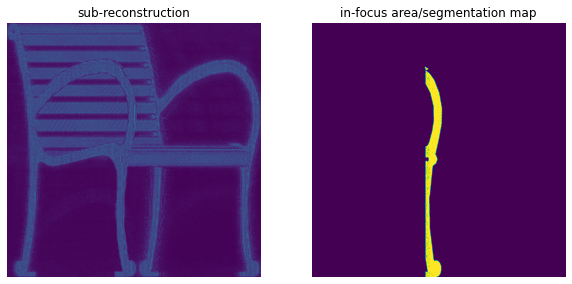

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(subrec_list[0][0]), plt.title('sub-reconstruction'), plt.axis('off')
plt.subplot(122), plt.imshow(list(reversed(grid_list))[-0]), plt.title('in-focus area/segmentation map'), plt.axis('off')
plt.savefig('dataset.jpg',bbox_inches='tight')